In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("2-multiplegradesdataset.csv")

In [4]:
df.head(10)

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5
5,3.6,7.9,92.0,2.3,77.9
6,6.4,6.2,99.4,4.9,89.5
7,5.2,6.7,90.9,3.5,85.1
8,3.3,7.3,91.3,1.8,82.8
9,4.8,8.0,89.6,3.7,100.0


In [5]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [7]:
df.isnull().sum()

Study Hours           0
Sleep Hours           0
Attendance Rate       0
Social Media Hours    0
Exam Score            0
dtype: int64

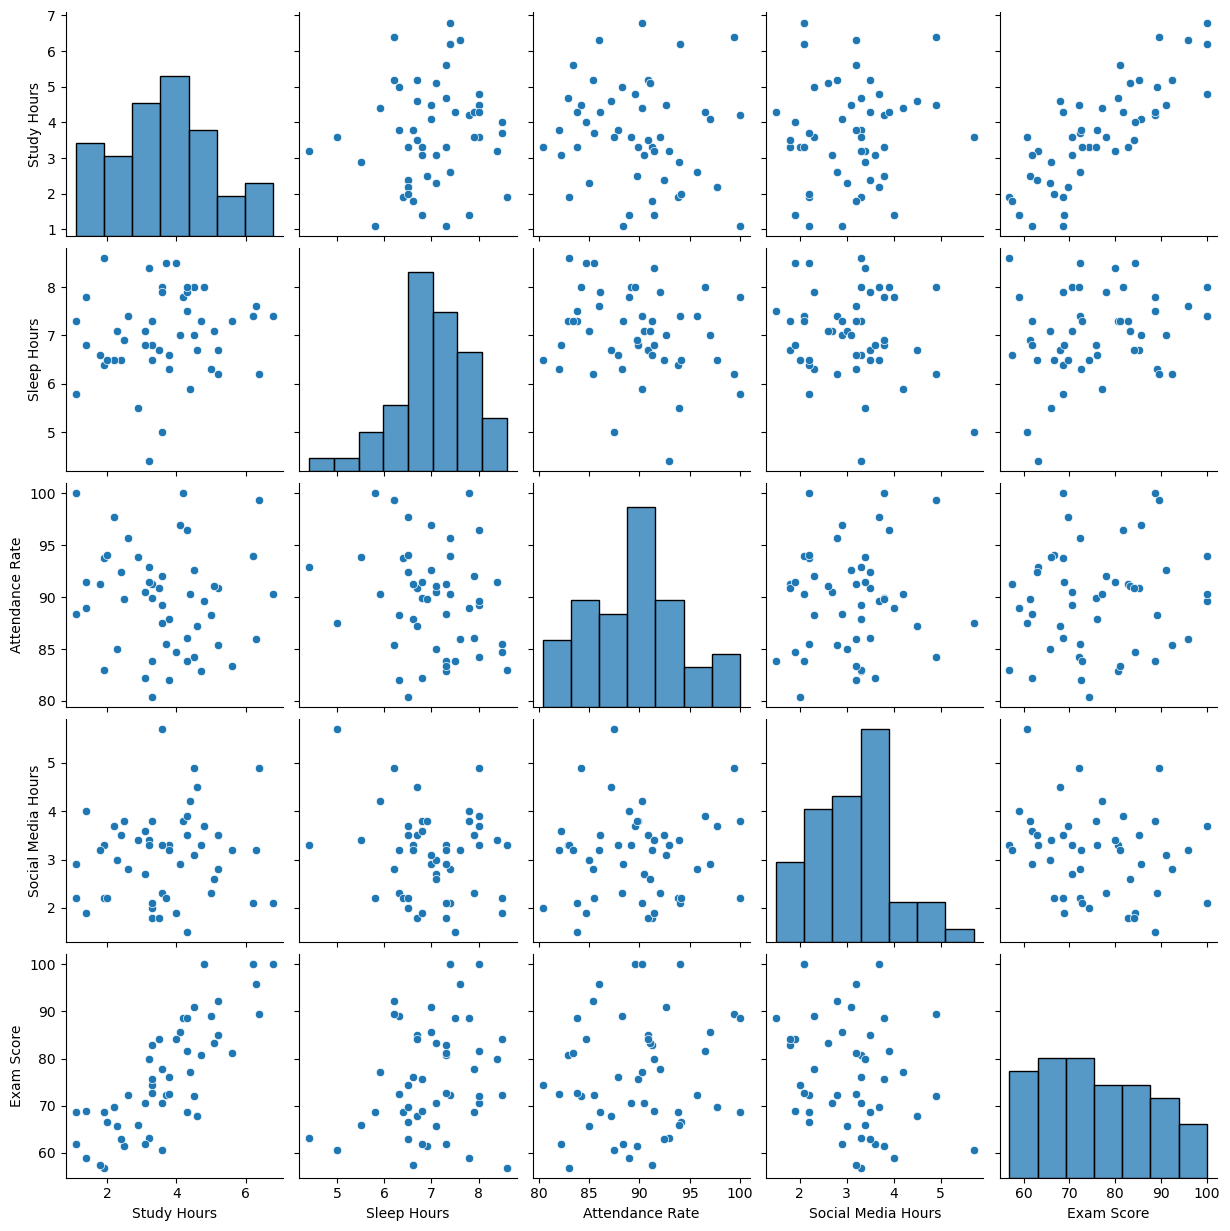

In [17]:
sns.pairplot(df) #bütün df'i gösterelim
plt.show()

In [18]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


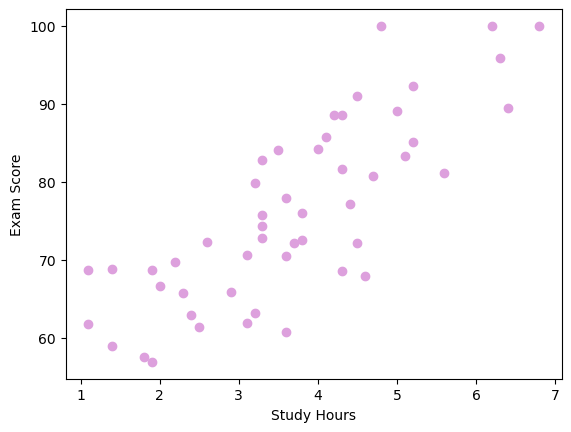

In [20]:
plt.scatter(df["Study Hours"], df["Exam Score"], color="#dda0dd")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show() #çok fazla kolon varsa, korelasyona yakından bu şekilde bakabiliriz tek tek yazarak

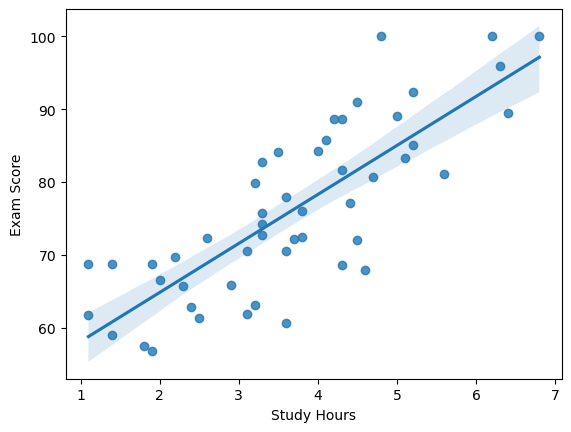

In [21]:
#regplot bestfit line'ı çizmeye çalışır
sns.regplot(x=df['Study Hours'], y=df['Exam Score'])
plt.show()

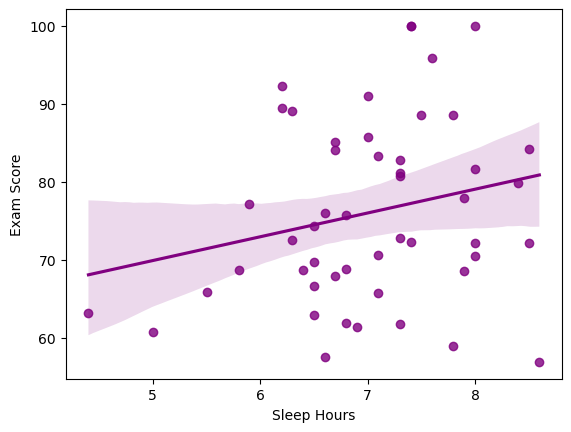

In [22]:
sns.regplot(x=df['Sleep Hours'], y=df['Exam Score'],color="purple")
plt.show()

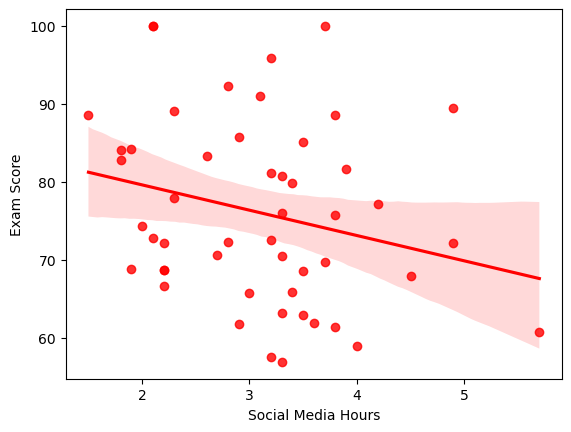

In [23]:
sns.regplot(x=df['Social Media Hours'], y=df['Exam Score'],color="red")
plt.show()

In [24]:
df.tail()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
45,2.9,5.5,93.9,3.4,65.9
46,3.3,7.3,83.8,2.1,72.8
47,5.6,7.3,83.4,3.2,81.1
48,4.5,7.0,92.6,3.1,91.0
49,1.4,6.8,91.5,1.9,68.8


In [32]:
# independent and dependent features 

#Bazı kaynaklarda bunu görebilirsiniz:
# X = df.iloc[:,:-1] #son kolon hariç hepsini al demek (Exam score'u almaz yani)
# y = df.iloc[:,-1] #sadece son kolonu al demek (exam score'u alır)


X = df[["Study Hours","Sleep Hours","Attendance Rate","Social Media Hours"]]
y = df["Exam Score"]

In [33]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [34]:
y.head()

0    80.7
1    76.0
2    89.1
3    95.9
4    70.5
Name: Exam Score, dtype: float64

### Train - Test Split Yapalım

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=15 ) 
#verinin %25'i test için, %75'i eğitim için ayrılır

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)

In [40]:
X_test = scaler.transform(X_test)

In [41]:
X_train

array([[ 7.64922342e-01,  1.07637448e+00,  2.70413080e-03,
         6.75932027e-01],
       [-1.60676425e+00, -3.94765312e-01,  3.42883785e-01,
         1.46070057e-01],
       [ 1.39737210e+00,  3.40804586e-01, -1.23795108e+00,
         1.46070057e-01],
       [-1.92298913e+00, -1.84602484e-01,  3.82904921e-01,
        -1.23157107e+00],
       [ 2.11528804e-01,  2.55603439e-02,  1.48348616e+00,
        -1.71847126e-01],
       [ 2.90585024e-01,  8.66211656e-01,  2.08380319e+00,
         7.81904421e-01],
       [-2.56398550e-02, -7.10009554e-01, -1.51809903e+00,
         1.46070057e-01],
       [ 9.23034781e-01, -7.10009554e-01, -2.57433252e-01,
        -8.07681490e-01],
       [-4.20920953e-01,  3.40804586e-01, -1.15790881e+00,
        -1.01962628e+00],
       [-2.56398550e-02, -3.94765312e-01, -3.37475524e-01,
         2.52042451e-01],
       [ 3.69641243e-01,  5.50967414e-01, -1.15790881e+00,
        -1.65546064e+00],
       [-9.74314491e-01,  4.45886000e-01,  1.22334877e+00,
      

In [42]:
X_test

array([[-1.29053937, -0.49984673,  1.62356013,  0.67593203],
       [-2.16015779,  0.34080459, -0.23742268, -0.17184713],
       [ 0.36964124,  1.07637448,  1.38343332,  0.88787682],
       [-1.21148315,  0.13064176, -0.91778199, -0.06587473],
       [-1.44865181, -0.49984673,  0.90317969, -0.91365388],
       [-0.26280851, -0.2896839 ,  0.26284151, -1.33754346],
       [ 1.95076564,  0.65604883, -0.71767631,  0.14607006],
       [-1.13242693, -0.49984673,  0.56300003,  0.46398724],
       [-0.57903339, -0.18460248, -1.47807789,  0.56995963],
       [ 0.36964124,  0.97129307, -0.69766575,  0.46398724],
       [-1.92298913,  0.86621166, -0.11735928,  0.99384921],
       [-1.05337071, -0.07952107,  0.04272527,  0.78190442],
       [ 1.87170942,  0.445886  ,  0.88316912, -1.01962628]])

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
regression = LinearRegression()

In [45]:
regression.fit(X_train, y_train) #eğittik

LinearRegression()

In [46]:
#Yeni bir öğrenci gelseydi eğer, bu yeni öğrencinin notunu tahmin edebiliriz
#Önce manuel şekilde yapalım

In [47]:
X_test[0] #ilk elemana bakalım

array([-1.29053937, -0.49984673,  1.62356013,  0.67593203])

In [48]:
df.iloc[0]

Study Hours            4.7
Sleep Hours            7.3
Attendance Rate       82.9
Social Media Hours     3.3
Exam Score            80.7
Name: 0, dtype: float64

In [49]:
new_student = [[5,7,90,2]] #5 saat çalıştı, 7 saat uyudu, derslerin %90'ına katıldı, sosyal medyada 2 saat geçirdi

In [50]:
new_student_scaled = scaler.transform(new_student)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [51]:
regression.predict(new_student_scaled)

array([90.88471349])

### Prediction

In [52]:
y_pred = regression.predict(X_test)

In [53]:
y_pred

array([ 67.04704385,  57.90545589,  83.63084813,  63.69399367,
        69.73079557,  80.76485587,  93.76445033,  65.93953528,
        64.58675718,  78.42296106,  56.67860558,  64.44046585,
       102.60438643])

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [55]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("mse:" , mse)
print("mae: ", mae)


mse: 14.600589378986264
mae:  3.2770264859627867


In [56]:
score = r2_score(y_test,y_pred)
print("r2 score:" , score)

r2 score: 0.915670734577271


In [57]:
#adjusted r2 score:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8735061018659065

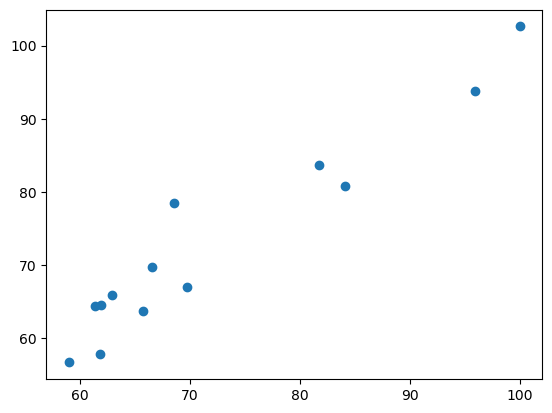

In [58]:
plt.scatter(y_test,y_pred)
plt.show()

In [59]:
y_test

35     69.7
37     61.8
41     81.7
26     65.7
38     66.6
43     84.1
3      95.9
33     62.9
30     61.9
36     68.6
14     59.0
16     61.4
20    100.0
Name: Exam Score, dtype: float64

In [60]:
y_pred

array([ 67.04704385,  57.90545589,  83.63084813,  63.69399367,
        69.73079557,  80.76485587,  93.76445033,  65.93953528,
        64.58675718,  78.42296106,  56.67860558,  64.44046585,
       102.60438643])

In [61]:
residuals = y_test - y_pred #yani hata

In [62]:
print(residuals)

35    2.652956
37    3.894544
41   -1.930848
26    2.006006
38   -3.130796
43    3.335144
3     2.135550
33   -3.039535
30   -2.686757
36   -9.822961
14    2.321394
16   -3.040466
20   -2.604386
Name: Exam Score, dtype: float64


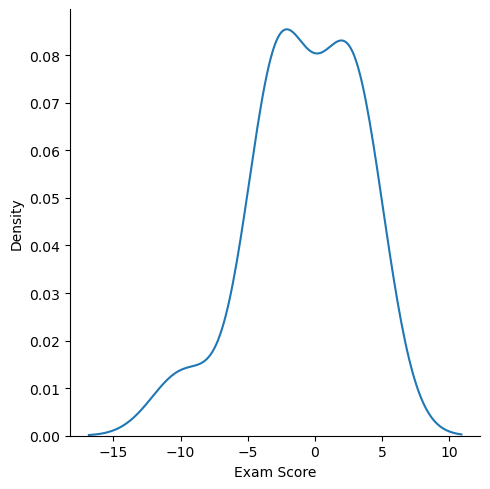

In [63]:
sns.displot(residuals, kind="kde")
plt.show()

In [66]:
regression.intercept_ #y eksenini kestiği nokta

np.float64(77.41081081081082)

In [67]:
regression.coef_

array([ 9.28014703,  1.78967062,  3.24340001, -4.08127695])

In [68]:
df

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5
5,3.6,7.9,92.0,2.3,77.9
6,6.4,6.2,99.4,4.9,89.5
7,5.2,6.7,90.9,3.5,85.1
8,3.3,7.3,91.3,1.8,82.8
9,4.8,8.0,89.6,3.7,100.0


In [69]:
new_student

[[5, 7, 90, 2]]

In [75]:
students = [
    [6, 8, 95, 5],
    [3, 6, 85, 4],
    [4, 7, 80, 3]
] #yeni öğrenciler ekledik

In [76]:
regression.predict(scaler.transform(students))

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([90.37189122, 62.43586785, 72.73292556])